In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import util
import time

In [2]:
folder_path = 'datasets/kaggle_clement/split_files/'
train_file = 'train.csv'
test_file = 'test.csv'
save_file = 'test_pred.csv'
train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

In [11]:
model = Pipeline(steps=[('tfidf',TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)), ('svm', svm.SVC(kernel="linear", C=0.025))])
model.fit(train_X, train_Y)
pred_Y = model.predict(test_X)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-11-b8c64cdf061d>, line 1)

In [9]:
disp = plot_confusion_matrix(model, test_X, test_Y,cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

In [10]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, pred_Y) * 100, 2)) + "%")

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [17]:
print(classification_report(test_Y,pred_Y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3505
           1       0.98      0.98      0.98      3230

    accuracy                           0.98      6735
   macro avg       0.98      0.98      0.98      6735
weighted avg       0.98      0.98      0.98      6735



In [28]:
vocab=model.named_steps['tfidf'].vocabulary_
coef=list(model.named_steps['log'].coef_[0])

top_features=[]
for i in range(100):
    k = coef.index(max(coef))
    top_features.append(k)
    coef.pop(k)

for f in top_features:
    print({k:v for k, v in vocab.items() if v == f})

{'reuters': 79693}
{'sahwa': 82065}
{'washing': 100744}
{'wedgies': 101114}
{'tues': 95902}
{'thurmond': 93605}
{'republican': 79179}
{'monday': 62774}
{'friday': 38216}
{'minisme': 61861}
{'nouveaux': 67007}
{'presidentdimwit': 74277}
{'comment': 23211}
{'spoils': 88288}
{'democrat': 27918}
{'ycp6ppsuyg': 103652}
{'reported': 79079}
{'tokai': 94234}
{'montevideo': 62935}
{'eds': 32108}
{'lommis': 57075}
{'statefarmshould': 88933}
{'governability': 40949}
{'saycheesetv': 82876}
{'kill': 52960}
{'morty': 63199}
{'repost': 79105}
{'peprosenfeld': 71461}
{'coursing': 25000}
{'electable': 32454}
{'agency': 8266}
{'inclinations': 47325}
{'parking': 70478}
{'lwin': 57751}
{'brit': 17583}
{'mining': 61853}
{'semiconductors': 84137}
{'oppo': 68667}
{'trabajo': 94729}
{'risque': 80343}
{'shouse': 85543}
{'unintimidated': 97566}
{'yoke': 103946}
{'capi': 19301}
{'declassified': 27311}
{'mwswjw7qbk': 64228}
{'summit': 90458}
{'partiers': 70595}
{'splinter': 88267}
{'dengue': 28008}
{'essential': 

In [20]:
dual=[False]
penalty=['l2']
tol=[1e-3,1e-4,1e-5]
max_iter=[80,90,100]

param_grid = {
    'log__dual': dual,
    'log__penalty': penalty,
    'log__tol': tol,
    'log__max_iter': max_iter
}
grid=RandomizedSearchCV(model,param_grid, n_jobs=3, n_iter=10)
start_time = time.time()
grid_result = grid.fit(train_X, train_Y)
print("Execution time: " + str((time.time() - start_time)) + ' ms')
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

Execution time: 668.925947189331 ms
Best parameter (CV score=0.984):
{'log__tol': 0.001, 'log__penalty': 'l2', 'log__max_iter': 80, 'log__dual': False}


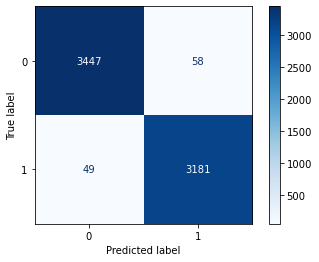

In [23]:

optimized_pred_Y = grid.best_estimator_.predict(test_X)

disp = plot_confusion_matrix(grid.best_estimator_, test_X, test_Y,cmap=plt.cm.Blues)
plt.savefig("log_reg_optimized_confusion.png")


In [25]:
print("Model Accuracy: " + str(round(accuracy_score(test_Y, optimized_pred_Y) * 100, 2)) + "%")

Model Accuracy: 98.41%


In [26]:
print(classification_report(test_Y,optimized_pred_Y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3505
           1       0.98      0.98      0.98      3230

    accuracy                           0.98      6735
   macro avg       0.98      0.98      0.98      6735
weighted avg       0.98      0.98      0.98      6735

